EXPLORATORY DATA ANALYSIS OF TWEETS

In [1]:
# I will use the task4saynotoxenophobia csv file that I got after running the task4_extract_tweets.py
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
# Loading CSV file
df_xenophobic = pd.read_csv ("task4SayNoToXenophobia.csv")
df_xenophobic.drop_duplicates(keep = False,inplace=True)
df_xenophobic.head()

,"b""@burnaboy You've said it all. #saynotoxenophobia"""
3,b'The truth is nobody really wins when two bro...
4,b'RT @ahizecd: This is the best video I\xe2\x8...
5,b'RT @MTVBaseAfrica: A manifesto and a call to...
7,b'Gods grace is sufficient \n\n ...
8,"b""RT @musty_mustaphar: If you don't feel, then..."


In [2]:
# We are going to change this to keyt
def combine_text(list_of_text):
    '''Takes a list of tweets and combines them into one large chunk of tweet.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [3]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in df_xenophobic.items()}

In [4]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['text']
data_df = data_df.sort_index()
data_df

,text
"b""@burnaboy You've said it all. #saynotoxenophobia""",b'The truth is nobody really wins when two brothers are at war. South Africa \xf0\x9f\x87\xbf\xf0\x9f\x87\xa6 Nigeria \xf0\x9f\x87\xb3\xf0\x9f\x87...


In [5]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [6]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.text.apply(round1))
data_clean

,text
"b""@burnaboy You've said it all. #saynotoxenophobia""",bthe truth is nobody really wins when two brothers are at war south africa nigeria we are one brt ahizecd this is the best video seen all da...


In [7]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [8]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.text.apply(round2))
data_clean

,text
"b""@burnaboy You've said it all. #saynotoxenophobia""",bthe truth is nobody really wins when two brothers are at war south africa nigeria we are one brt ahizecd this is the best video seen all da...


In [9]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,able,absolutely,abuse,accountable,action,affecting,africa,african,africans,africarightstalk,...,wrong,xenophobia,xenophobic,xenophobicattack,xenophobicattacks,xs,xxxtentacions,yinka,youre,zimbabwean
"b""@burnaboy You've said it all. #saynotoxenophobia""",1,1,1,1,1,1,4,4,5,1,...,3,2,2,1,1,1,1,1,2,1


In [10]:
# Read and transpose the document-term matrix
import pandas as pd

data = data_dtm
data = data.transpose()
data.head()

,"b""@burnaboy You've said it all. #saynotoxenophobia"""
able,1
absolutely,1
abuse,1
accountable,1
action,1


In [11]:
# Find the top 30 words used in each tweet
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'b"@burnaboy You\'ve said it all. #saynotoxenophobia"': [('brt', 42),
  ('saynotoxenophobia', 20),
  ('south', 10),
  ('burnaboy', 5),
  ('just', 5),
  ('like', 5),
  ('africans', 5),
  ('african', 4),
  ('nigeria', 4),
  ('dont', 4),
  ('blacks', 4),
  ('africa', 4),
  ('government', 3),
  ('nnot', 3),
  ('stoptheviolence', 3),
  ('people', 3),
  ('attacks', 3),
  ('love', 3),
  ('problem', 3),
  ('president', 3),
  ('rt', 3),
  ('bio', 3),
  ('brothers', 3),
  ('nigerians', 3),
  ('killing', 3),
  ('kill', 3),
  ('nigerian', 3),
  ('wrong', 3),
  ('listen', 3),
  ('matter', 2)]}

In [12]:
# Print the top 15 words said in each tweet
for text, top_words in top_dict.items():
    print(text)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

b"@burnaboy You've said it all. #saynotoxenophobia"
brt, saynotoxenophobia, south, burnaboy, just, like, africans, african, nigeria, dont, blacks, africa, government, nnot
---


In [13]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each tweet
words = []
for text in data.columns:
    top = [word for (word, count) in top_dict[text]]
    for t in top:
        words.append(t)
        
words

['brt',
 'saynotoxenophobia',
 'south',
 'burnaboy',
 'just',
 'like',
 'africans',
 'african',
 'nigeria',
 'dont',
 'blacks',
 'africa',
 'government',
 'nnot',
 'stoptheviolence',
 'people',
 'attacks',
 'love',
 'problem',
 'president',
 'rt',
 'bio',
 'brothers',
 'nigerians',
 'killing',
 'kill',
 'nigerian',
 'wrong',
 'listen',
 'matter']

In [14]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('brt', 1),
 ('saynotoxenophobia', 1),
 ('south', 1),
 ('burnaboy', 1),
 ('just', 1),
 ('like', 1),
 ('africans', 1),
 ('african', 1),
 ('nigeria', 1),
 ('dont', 1),
 ('blacks', 1),
 ('africa', 1),
 ('government', 1),
 ('nnot', 1),
 ('stoptheviolence', 1),
 ('people', 1),
 ('attacks', 1),
 ('love', 1),
 ('problem', 1),
 ('president', 1),
 ('rt', 1),
 ('bio', 1),
 ('brothers', 1),
 ('nigerians', 1),
 ('killing', 1),
 ('kill', 1),
 ('nigerian', 1),
 ('wrong', 1),
 ('listen', 1),
 ('matter', 1)]

In [15]:
# If more than half of the tweets have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count== 1]
add_stop_words

['brt',
 'saynotoxenophobia',
 'south',
 'burnaboy',
 'just',
 'like',
 'africans',
 'african',
 'nigeria',
 'dont',
 'blacks',
 'africa',
 'government',
 'nnot',
 'stoptheviolence',
 'people',
 'attacks',
 'love',
 'problem',
 'president',
 'rt',
 'bio',
 'brothers',
 'nigerians',
 'killing',
 'kill',
 'nigerian',
 'wrong',
 'listen',
 'matter']

In [16]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer


# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.text)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

In [17]:
# Let's make some word clouds!
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

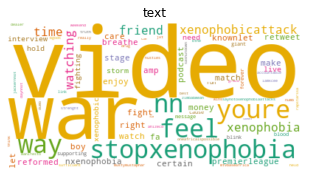

In [18]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [37, 24]

full_names = ['text']

# Create subplots for each comedian
for index, text in enumerate(data.columns):
    wc.generate(data_clean.text[text])
    
    plt.subplot(5, 6, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

Findings

Alot of people who used hashtag #SayNoToXenophobia in south Africa,used the words feel,war,Video,stopxenophobia alot

SENTIMENTAL ANALYSIS OF TWEETS

In [19]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd
data_clean

,text
"b""@burnaboy You've said it all. #saynotoxenophobia""",bthe truth is nobody really wins when two brothers are at war south africa nigeria we are one brt ahizecd this is the best video seen all da...


In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_clean['polarity'] = data_clean['text'].apply(pol)
data_clean['subjectivity'] = data_clean['text'].apply(sub)
data_clean

In [ ]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, text in enumerate(data_clean.index):
    x = data_clean.polarity.loc[text]
    y = data_clean.subjectivity.loc[text]
    plt.scatter(x, y, color='blue')
    #plt.text(x+.001, y+.001, data_clean['column_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

Findings

From the sample of tweets,we can see that the polarity tend to be neutral,their sentiments were neither strong negative nor strong negative